# Part I

#### 1. Create a Numpy array of length 26, containing samples from a normal distribution (mean=0 and std=1).

In [1]:
# https://nbviewer.jupyter.org/
import numpy as np
s = np.random.normal(0,1,26)
print(s)

[-0.18023302  0.62779567  1.35350912 -1.09745757 -0.30032274 -1.44545044
  1.34801073  0.57720895 -0.26188903  1.74571924  0.03694439 -1.88338913
 -2.28577071 -1.66751965  1.79268423  0.97701808 -0.40177588  1.19677802
 -1.47389921  0.33052063 -0.70190872  0.92676716  0.74654658 -0.40481465
  0.39406732 -0.83412425]


#### 2. Print the minimum, maximum, median, 25% and 75% quantiles of this data.

In [2]:
# Personally I'd keep it easy for myself and do it with pandas.describe() like this
import pandas as pd
df = pd.DataFrame(s)
print(df.describe())

               0
count  26.000000
mean   -0.034038
std     1.155857
min    -2.285771
25%    -0.801070
50%    -0.071644
75%     0.881712
max     1.792684


In [3]:
# Alternatively we could use numpy
print(' min:', np.min(s), '\n','25% quartile:',
      float(np.percentile(s,[25])), '\n',
      'median:', float(np.percentile(s,[50])), '\n',
      '75% quartile:', float(np.percentile(s,[75])), '\n',
      'max:', np.max(s))

 min: -2.28577071403 
 25% quartile: -0.8010703716262266 
 median: -0.07164431670206825 
 75% quartile: 0.8817120155039444 
 max: 1.79268423091


In [4]:
# For some extra brownie points lets show all the percentiles going up in intervals of 10%!
d = {key: np.percentile(s,key) for key in range(0,101,10)}

for key, value in d.items():
    print(str(key) + '% Percentile: ' + str(value))

0% Percentile: -2.28577071403
10% Percentile: -1.5707094289
20% Percentile: -1.09745756957
30% Percentile: -0.553361687237
40% Percentile: -0.300322743806
50% Percentile: -0.0716443167021
60% Percentile: 0.394067318903
70% Percentile: 0.687171126785
80% Percentile: 0.977018081865
90% Percentile: 1.35075992689
100% Percentile: 1.79268423091


#### 3. Create a 10x10 Numpy array of samples from a Poisson distribution (lambda=1).

In [5]:
p = np.random.poisson(1,size=(10,10))
print(p)

[[0 0 3 0 0 2 1 1 0 1]
 [0 1 2 2 0 2 1 1 1 2]
 [0 1 1 5 0 2 3 1 0 0]
 [1 2 2 2 1 0 0 2 1 1]
 [1 3 0 0 0 2 2 1 1 1]
 [0 1 2 3 1 1 2 1 3 0]
 [2 0 2 0 1 2 2 1 0 0]
 [2 2 0 0 1 1 2 0 0 1]
 [1 2 0 1 3 0 0 1 3 0]
 [0 1 1 1 1 0 3 0 3 2]]


#### 4. Print the maximum value of each row of the matrix.

In [6]:
for row in p:
    print(np.max(row))

3
2
5
2
3
3
2
2
3
3


#### 5. Store both the created array objects in a list structure.

In [7]:
arrays = [s,p]

#### 6. Print the length of each component of the list.

In [8]:
for array in arrays:
    print(len(array))

26
10


#### 7. Create a function to output the maximum value of each row of a matrix. Then use this function to re-run question 4.

In [9]:
def maxArray(array):
    for item in array:
        print(np.max(item))

In [10]:
maxArray(p)

3
2
5
2
3
3
2
2
3
3


#### 8. That all felt a little too easy. Let's add an extra question in to see what a normal distribution looks like in 3d.

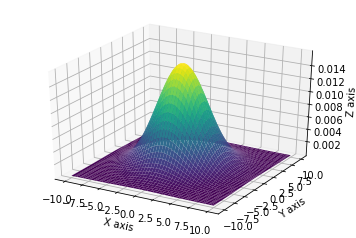

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

#Parameters to set
mu_x = 0
variance_x = 10

mu_y = 0
variance_y = 10

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

# Part II

#### 1. Write a function that will simulate numbers from a given distribution. The function should take one argument for the number of samples and a second argument which specifies the distribution (Normal, Poisson or Binomial). The function should be able to handle additional parameters depending on the distribution chosen, e.g. a ‘lambda’ for Poisson samples

In [12]:
def simNum(samples,distribution,mean=0,stddev=1,lamb=1,trials=None,probability=None):
    if distribution == 'normal':
        return np.random.normal(size=samples,loc=mean,scale=stddev)
    if distribution == 'poisson':
        return np.random.poisson(size=samples,lam=lamb)
    if distribution == 'binomial':
        if trials == None or probability == None:
            print('error: please include trials and probability arguments for binomial distribution')
        else:
            return np.random.binomial(size=samples,n=trials,p=probability)

In [13]:
simNum(10,'normal')

array([ 2.3544082 ,  0.7662865 ,  0.10622482,  0.21035821,  1.24983505,
        0.1255714 , -0.68781509, -1.95562926, -1.03079814, -2.06928906])

In [14]:
simNum(10,'binomial',probability=1)

error: please include trials and probability arguments for binomial distribution


In [15]:
simNum(10,'binomial',probability=0.5,trials=10)

array([7, 4, 5, 5, 4, 4, 3, 6, 5, 5])

In [16]:
simNum(5,'poisson',lamb=4)

array([3, 7, 0, 8, 3])

#### 2. Build a minimal Python package containing the single function above. Use any tools as necessary and include the installation instructions in a README file.

Please visit https://github.com/Roundy123/simNum for package installation instructions. The code for the function can be found in the __init__.py file in the simNum folder.